# Justin Butler
## AAE 439 - HW 4

File created in Jupyter Notebook and formatted using $\LaTeX$

In [1]:
%%javascript
// Making sure the outputs display correctly
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
# Importing required packages for this homework
import numpy as np
from math import isclose
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
%matplotlib inline

In [3]:
# Atmospheric model created using the NASA equation found at:
# https://www.grc.nasa.gov/WWW/k-12/airplane/atmosmet.html

class atmosphere:
    def __init__(self, val, valGiven = 0,units = "SI"):
        #Convert from US to SI
        if units != "SI" and valGiven == 0:
            val = val / 3.281
        if units != "SI" and valGiven == 1:
            val = val * 0.04788
        #0 implies the given value is an altitude
        #1 implies the given value is a pressure
        if valGiven == 0:
            self.h = val
        elif valGiven == 1:
            self.P = val
        else:
            print("Not a valid 'valGiven' parameter.")
    def hCalc(self):
        if self.h < 11000:
            self.T = 15.04 - 0.00649*self.h
            self.P = 101.29 * ((self.T + 273.1)/288.08)**(5.256)
        elif self.h < 25000:
            self.T = -56.46
            self.P = 22.65 * np.exp(1.73 - 0.000157*self.h)
        elif self.h > 24999:
            self.T = -131.21 + 0.00299*self.h
            self.P = 2.488 * ((self.T + 273.1)/216.6)**(-11.388)
        self.rho = self.P / (0.2869 * (self.T + 273.1))
    def PCalc(self):
        if self.P > 22.632:
            self.T = (288.08*(self.P/101.29)**(1/5.256))-273.1
            self.h = (self.T - 15.04)/(-0.00649)
        elif self.P > 0.1113586:
            self.T = -56.46
            self.h = (1.73 - np.log((self.P/22.65)))/(0.000157)
        else:
            self.T = (216.6*(self.P/2.488)**(1/(-11.388)))-273.1
            self.h = (self.T + 131.21)/0.00299
        self.rho = self.P / (0.2869 * (self.T + 273.1))

## Rounding function for better values throughout
def rounds(number):
    trunc = float('%.3f'% (number * 1000/1000))
    return(trunc)

### Problem 1: 4.13
COnsider a rocket nozzle fed by chamber gases with $c^*=1500$ m/s, $\gamma = 1.2$, and $P_c=5$ MPa. If the expansion ratio of this nozzle is 25 and the throat diameter is 10 cm perform the following tasks. (Results output after the code block)


In [4]:
####################
#      PART A      #
####################
"""
Determine the mass flow rate, thrust, thrust coefficient, and $I_sp$ assuming sea-level
operation with no nozzle separation.
"""
eps = 25
A_t = np.pi * (10./100.)**2 #sq meters
cStar = 1500 #m/s
P_c = 5000 #kPa
P_a = 101.325 #kPa
gamma = 1.2
g = 9.81 #m/s^2

### From the table, given epsilon = 25 ###
M = 5.000
NPR = 0.0018900
c_fv = 1.70103

### Calculations ###
mDot = (P_c * A_t)/cStar
c_f = c_fv - (P_a/P_c)*eps
I_sp = (c_f*cStar)/g
F = c_f*P_c*A_t

print("PART A)\nWith no separation, we will use a process similar to one of our previous assignments.")
print("See the code file for the process.")
table = [["Mass flow (kg/s)", mDot],
         ["Thrust (kN)", F],
         ["Thurst Coefficient", c_f],
         ["Specific Impulse (s)", I_sp]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))
####################
#      PART B      #
####################
"""
Determine the mass flow rate, thrust, thrust coefficient, and $I_sp$ assumign sea-level
operation with no nozzle separation.
"""
print("PART B)\nWe will use the Kalt-Bendall correlation to find an approximate location for the "
      "location of the seperation and take that to be the 'end' of the nozzle.")
P_sep = P_a * 0.667 * (P_c/P_a)**(-0.2)

### From the table, given P_sep/P_c = 0.00619757 ###
eps_sep = 11.0
M_sep = 4.029
c_fv_sep = 1.65373

### Calculations ###
mDot_sep = (P_c * A_t)/cStar
c_f_sep = c_fv_sep - (P_a/P_c)*eps_sep
I_sp_sep = (c_f_sep*cStar)/g
F_sep = c_f_sep*P_c*A_t

print("Separated values are below. See the code for the process.")
table = [["Mass flow (kg/s)", mDot_sep],
         ["Thrust (kN)", F_sep],
         ["Thurst Coefficient", c_f_sep],
         ["Specific Impulse (s)", I_sp_sep]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))
####################
#      PART D      #
####################
"""
What is the thrust and $I_{sp}$ consistent with conditions in part (c)

"""

end = True

PART A)
With no separation, we will use a process similar to one of our previous assignments.
See the code file for the process.


Mass flow (kg/s),0.10472
Thrust (kN),187.617
Thurst Coefficient,1.19441
Specific Impulse (s),182.631


PART B)
We will use the Kalt-Bendall correlation to find an approximate location for the location of the seperation and take that to be the 'end' of the nozzle.
Separated values are below. See the code for the process.


Mass flow (kg/s),0.10472
Thrust (kN),224.752
Thurst Coefficient,1.43081
Specific Impulse (s),218.779


PART C)

The nozzle will flow fully (using our correlation) when the fraction Psep/Pa is equal to the value that corresponds with an $\varepsilon$ of 25. The $\frac{p_e}{p_c}$ value is $0.00189$ for this condition. Thus, with $p_c = 5000$ kpa, the $p_{sep} = p_e = 5000 * 0.00189 = 9.45$ kPa. Utilizing the atmospheric model function as defined at the begining of this assignment we get:

In [5]:
atmos = atmosphere(9.45,valGiven=1,units='SI')
atmos.PCalc()
print("Altitude: " + str(rounds(atmos.h)) + " m")

Altitude: 16586.912 m


PART D)

The thrust and $I_{sp}$ values are:

In [6]:
P_a_full = 9.45 #kPa
mDot_full = (P_c * A_t)/cStar
c_f_full = c_fv_sep - (P_a_full/P_c)*eps
I_sp_full = (c_f_full*cStar)/g
F_full = c_f_full*P_c*A_t
table = [["Thrust (kN)", F_full],
         ["Specific Impulse (s)", I_sp_full]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Thrust (kN),252.345
Specific Impulse (s),245.639


### Problem 2: 4.32
A rocket nozzle has the following Mach number progression:
$$M = 1 + 1.8x + 0.55x^2 - 0.35x^3 \phantom{bigspace}-1\leq x\leq 2 ft$$
Where $x$ is the axial distance as measured from the nozzle throat. In addition, the following information is known:
$$T_c=6000^\circ R,\: p_c = 1000 \text{ psi},\: \gamma = 1.2,\: \mathcal{M}=22 \text{ lb/lb-mol}$$

PART A)

Plot the nozzle contour $r = r(x)$. What is the nozzle expansion ratio?


$$M_e = M(2) = 1 + 1.8(2) + 0.55(2)^2 - 0.35(2)^3 = 4$$

From tables:<br>
$\varepsilon \approx 11.0$<br>
$\frac{p_e}{p_c} \approx 0.0063363$<br>
$C_{fv} \approx 1.65373$<br>
and thus:<br>
$p_e = 1000 * 0.0063363 = 6.3363$ psi

Therefore, the expansion ratio is approximately 11.

The plot is given below. To find the ratio of $r(x)$ to $r^*$ we used continuity to equate $\dot{m}(x) = \dot{m}^*$ thus giving us:
$$1 = \frac{M(x)A(x)}{M^*A^*}$$
Solving this for $r(x)/r^*$ we obtained:
$$\frac{r(x)}{r^*} = \sqrt{\frac{M^*}{M(x)}}$$
where $M^* =1$

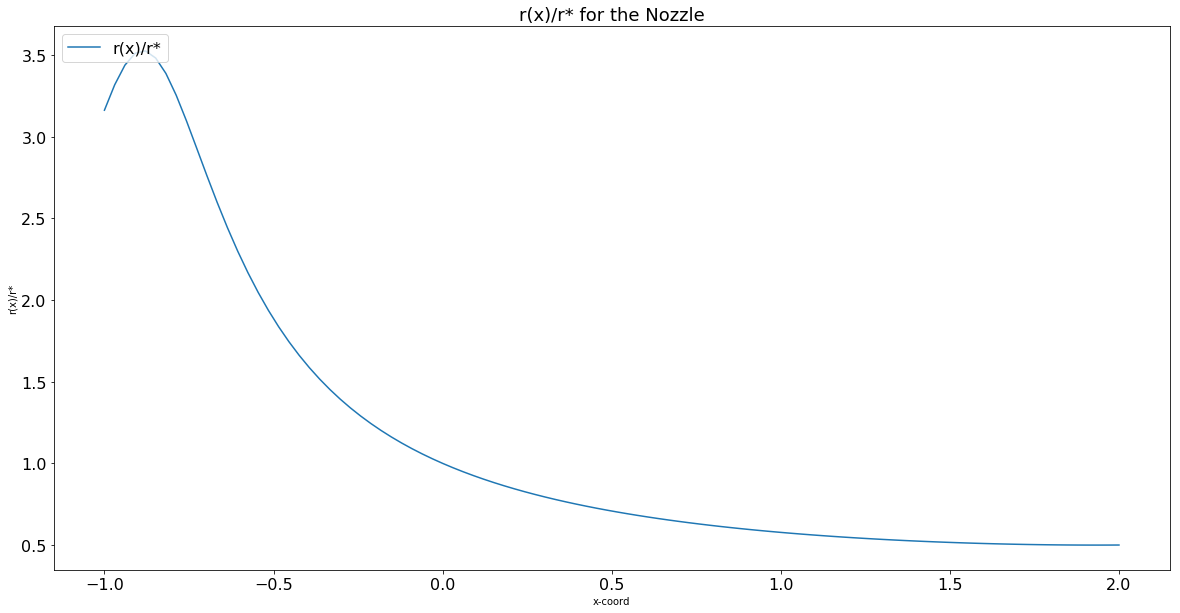

This plot is, I believe, upside down. But even then it doesn't seem quite right. I don't know what kind of nozzle this is.


In [7]:
####### SETTING UP THE PLOT ########
x = np.linspace(-1,2,100)
MStar = 1.
M = 1 + 1.8*x + 0.55*x**2 - 0.35*x**3
ratio = np.sqrt(MStar/M)

####### PLOT ########
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
#
plt.plot(x,ratio,'-',label="r(x)/r*")
#
plt.title('r(x)/r* for the Nozzle', fontsize=18)
#plt.xlim(0,0.05)
#plt.ylim(0,0.1)
plt.xlabel('x-coord')
plt.ylabel('r(x)/r*')
plt.legend(loc=2, fontsize=16)
#
#plt.savefig('figure')
#
plt.show()
plt.close()
print("This plot is, I believe, upside down. But even then it doesn't seem quite right."+
      " I don't know what kind of nozzle this is.")

PART B)

Plot p/pc, and T/Tc as a function of x. See the plot below. We use isentropic relations and assume that $p_c = p_t$ and that $T_c = T_t$.

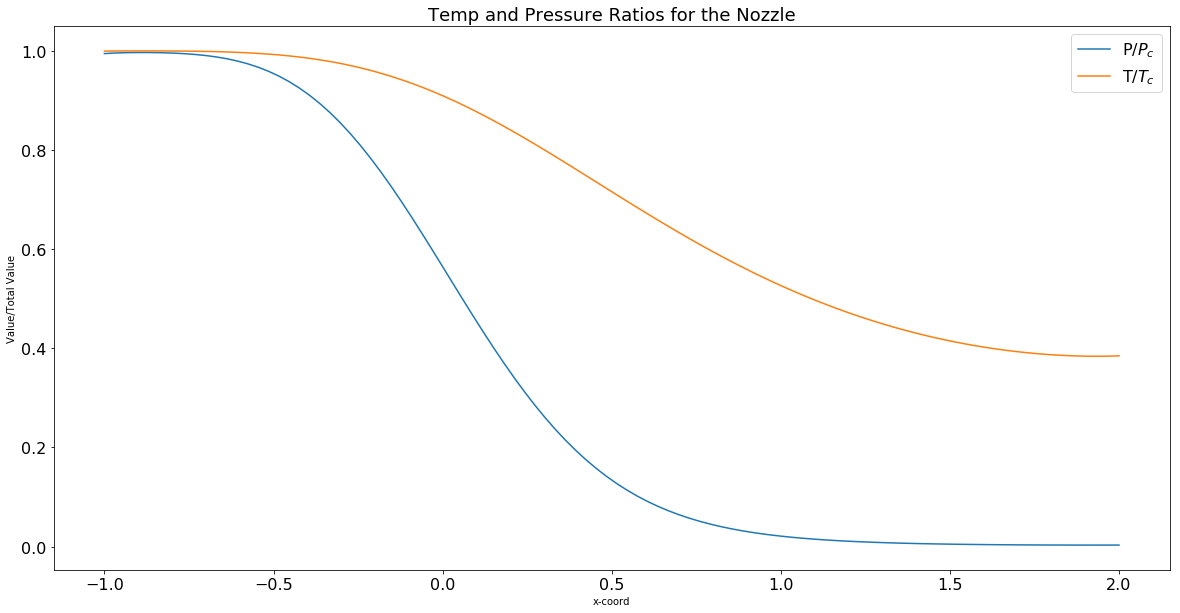

Exit values:


Exit Temperature ($^\circ$R),2307.88
Exit Pressure (psi),3.23725


In [8]:
#### ISENTROPIC RELATION FUNCTIONS ####
def statPres(Pt, M):
    static = Pt / ((1+((gamma-1)/2)*M**2)**(gamma/(gamma-1)))
    return(static)
def statTemp(Tt, M):
    static = Tt / ((1+((gamma-1)/2)*M**2))
    return(static)

#### MACH FUNCTION ####
def mach(x):
    M = 1 + 1.8*x + 0.55*x**2 - 0.35*x**3
    return(M)

####### SETTING UP THE PLOT ########
gamma = 1.2
P_c = 1000 * 6.895 #kPa
T_c = 6000 * 0.5556 #Kelvin
P = statPres(P_c,mach(x))/P_c
T = statTemp(T_c,mach(x))/T_c

####### PLOT ########
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
#
plt.plot(x,P,'-',label="P/$P_c$")
plt.plot(x,T,'-',label="T/$T_c$")
#
plt.title('Temp and Pressure Ratios for the Nozzle', fontsize=18)
#plt.xlim(0,0.05)
#plt.ylim(0,0.1)
plt.xlabel('x-coord')
plt.ylabel('Value/Total Value')
plt.legend(loc=1, fontsize=16)
#
#plt.savefig('figure')
#
plt.show()
plt.close()
print("Exit values:")
table = [["Exit Temperature ($^\circ$R)", T[-1]*T_c*1.8],
         ["Exit Pressure (psi)", P[-1]*P_c*0.145038]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

PART C)

Since we haven't created a method for finding $C_{fv}$ we will have to plot this manually. We will use 5 points for each of the following ambient pressures:

$p_a = 0$<br>
$p_a = 5$<br>
$p_a = 15$

$x = \{0,0.5,1,1.5,2\}$

To find the values, we will first find the Mach at these values. Then, using the table in Appendix B we will find approximate $C_{fv}$ and $\varepsilon$ values. From these we will will find $C_f$ values as if the nozzle had been cut at the $x$ location given.

In [9]:
pa = [0,5,15]
x = [0,0.5,1,1.5,2]
M = [rounds(mach(item)) for item in x]
print("Mach Values: \n", M)

Mach Values: 
 [1.0, 1.994, 3.0, 3.756, 4.0]


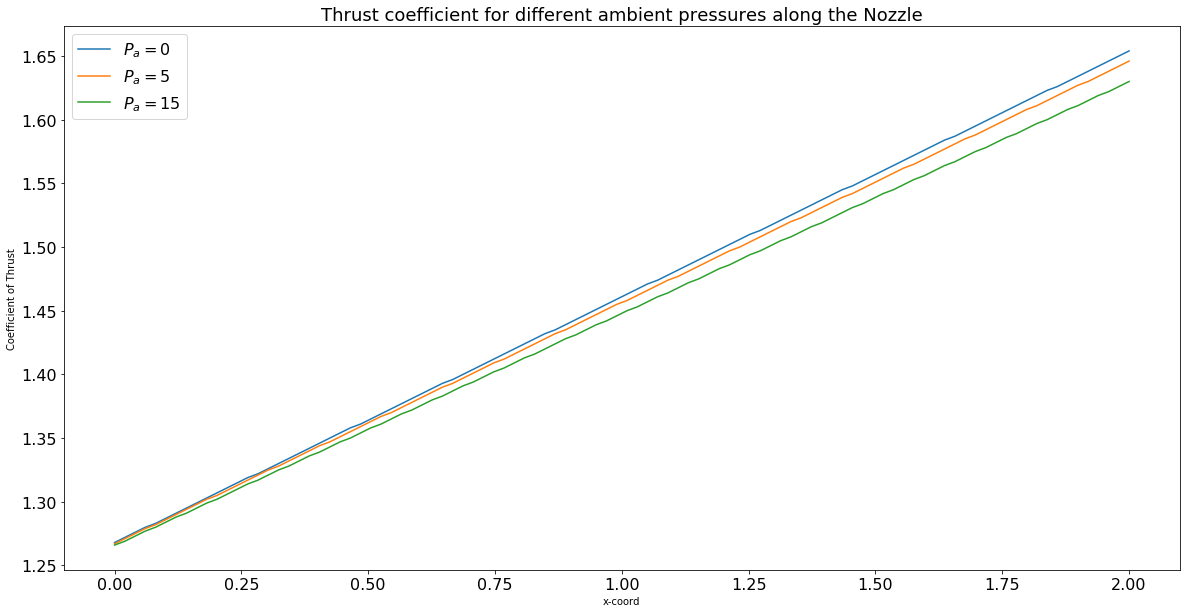

In [10]:
## FROM TABLE ##
x = np.linspace(0,2, 100)
eps = np.linspace(1,11,100)
C_fv = np.linspace(1.26788,1.65373,100)

#eps = [1, 2.0, 4.0, 9.0, 11.0]
#C_fv = [1.26788, 1.4576, 1.56114, 1.63902, 1.65373]
C_f = []
for item in pa:
    fill = []
    for j in range(len(eps)):
        fill.append(rounds(C_fv[j] - (item/P_c)*eps[j]))
    C_f.append(fill)
####### PLOT ########
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
#
plt.plot(x,C_f[0],'-',label="$P_a = 0$")
plt.plot(x,C_f[1],'-',label="$P_a = 5$")
plt.plot(x,C_f[2],'-',label="$P_a = 15$")
#
plt.title('Thrust coefficient for different ambient pressures along the Nozzle', fontsize=18)
#plt.xlim(0,0.05)
#plt.ylim(0,0.1)
plt.xlabel('x-coord')
plt.ylabel('Coefficient of Thrust')
plt.legend(loc=2, fontsize=16)
#
#plt.savefig('figure')
#
plt.show()
plt.close()

### Problem 3: 4.34
A sounding rocket intends to utilize an extendible exit cone (EEC) to improve performance during its ascent through the atmosphere. Ther following characteristics are known:<br>
$c^* = 1500 m/s$<br>
$A_t=100$ cm$^2$<br>
$\gamma=1.2$<br>
$p_c = 100$ atm<br>
$t_b = 100$ s<br>
$\varepsilon_1 = 10, \varepsilon_2 = 25, \varepsilon_3 = 50$<br>
Deployment Altitudes: $h_1 = 0$ km, $h_2 = 10$ km, $h_3 = 25$ km<br>
Burnout Altitude $= 75$ km

PART A)

Plot the $I_sp$ of this rocket from $0\leq h\leq 50$ km.

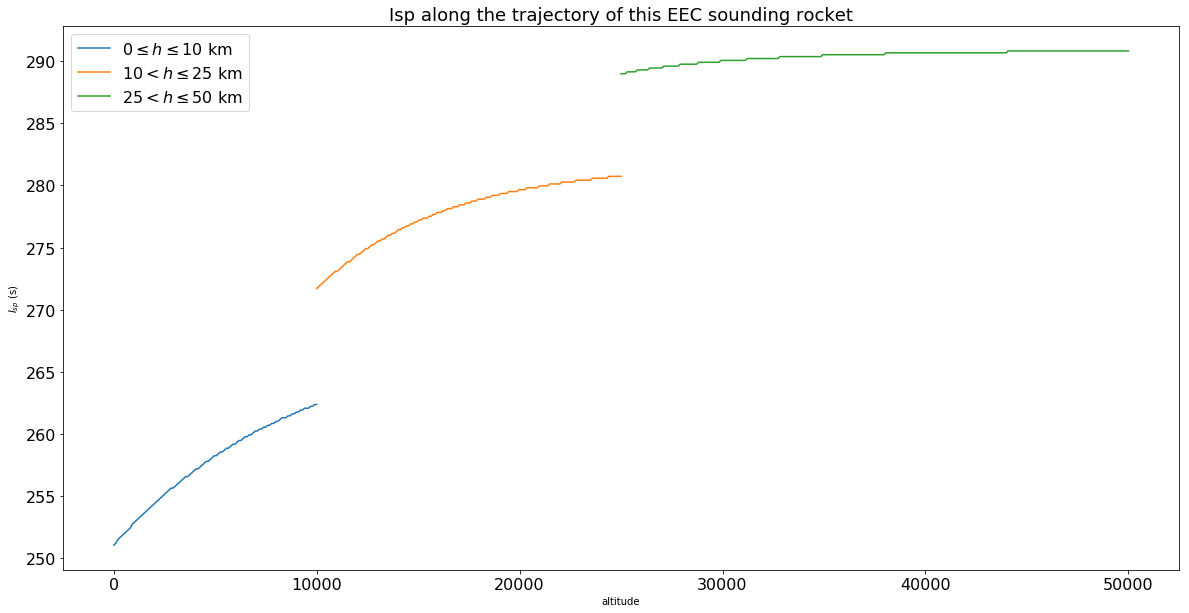

In [11]:
####### SETTING UP THE PLOT ########
P_c = 100*101.325 #kPa
A_t = 100 / 100**2 #sq. meters
g = 9.81 #m/s
cStar = 1500 #m/s
h1 = np.linspace(0,10000,100)
h2 = np.linspace(10000,25000,150)
h3 = np.linspace(25000,50000,250)
h4 = np.linspace(50000,75000,250)
h = [h1,h2,h3,h4]
eps = [10,25,50]
c_fv = [1.74231,1.84238,1.90236]
c_f = []
i = 0
for item in h:
    fillTerm = []
    for jtem in item:
        atmos = atmosphere(jtem,0,'SI')
        atmos.hCalc()
        fillTerm.append(rounds(c_fv[i] - (atmos.P/P_c)*eps[i]))
    c_f.append(fillTerm)
    if i != 2:
        i += 1
Isp = []
for item in c_f:
    fillterm = []
    for jtem in item:
        fillterm.append((jtem*cStar)/g)
    Isp.append(fillterm)

####### PLOT ########
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
#
plt.plot(h[0],Isp[0],'-',label="$0\leq h\leq 10$ km")
plt.plot(h[1],Isp[1],'-',label="$10 < h \leq 25$ km")
plt.plot(h[2],Isp[2],'-',label="$25 < h \leq 50$ km")
#
plt.title('Isp along the trajectory of this EEC sounding rocket', fontsize=18)
#plt.xlim(0,0.05)
#plt.ylim(0,0.1)
plt.xlabel('altitude')
plt.ylabel('$I_{sp}$ (s)')
plt.legend(loc=2, fontsize=16)
#
#plt.savefig('figure')
#
plt.show()
plt.close()

PART B)

Since we are assuming a constant acceleration, and since we can assume velocity/position are both 0 and time=0, we can solve for the quadratic that models height as a function of time.

$s(t) = at^2 + bt + c$ is the equation we need to solve. Since we know that (0,0) is on the plot and that $\frac{ds}{dt} =0$ at $x=0$, this implies that $b=0$ and $c=0$. Thus, we can find $a$ from $a(100)^2 = 75km \to a = \frac{75 km}{100^2s}$

From this, we can match times with altitudes. From these matching terms, we can construct a numerical method to approximate the the integral of $I_{sp}$ (using the wrong $I_{sp}$ graph from above, but hopefully this process is mostly correct). Since $\dot{m}$ is constant we will have:
$$I = \dot{m}\int_0^{t_b}I_{sp}dt$$

This integral method is given below. It is as left sided approximation, as we take the $I_{sp}$ values that correspond to a height below the height a given time $t$. 

In [12]:
# 750 total points on the Isp graph above
t = np.linspace(0,100, 750)
h_t = (75000/100**2)*t**2
def nearly_equal(a,b,sig_fig=7):
    return(a==b or
           int(a*10**sig_fig) == int(b*10**sig_fig)
          )
hFull = []
for item in h:
    for jtem in item:
        hFull.append(jtem)
hIndex = []
impulse = 0
for i in range(len(h)):
    for jtem in h_t:
        for ktem in h[i]:
            if nearly_equal(rounds(ktem),rounds(jtem),-2):
                k = np.where(h[i] == ktem)[0][0]
                j = np.where(h_t == jtem)[0][0]
                impulse += Isp[i][k]
mDot = (P_c * A_t)/cStar
impulse = impulse * mDot
print("Using a left handed approximation, the total impulse we have calculated was:")
print(rounds(impulse))

Using a left handed approximation, the total impulse we have calculated was:
13933.974


PART C)

TIME TO REPEAT THE LAST TWO PARTS! WOOO!!!

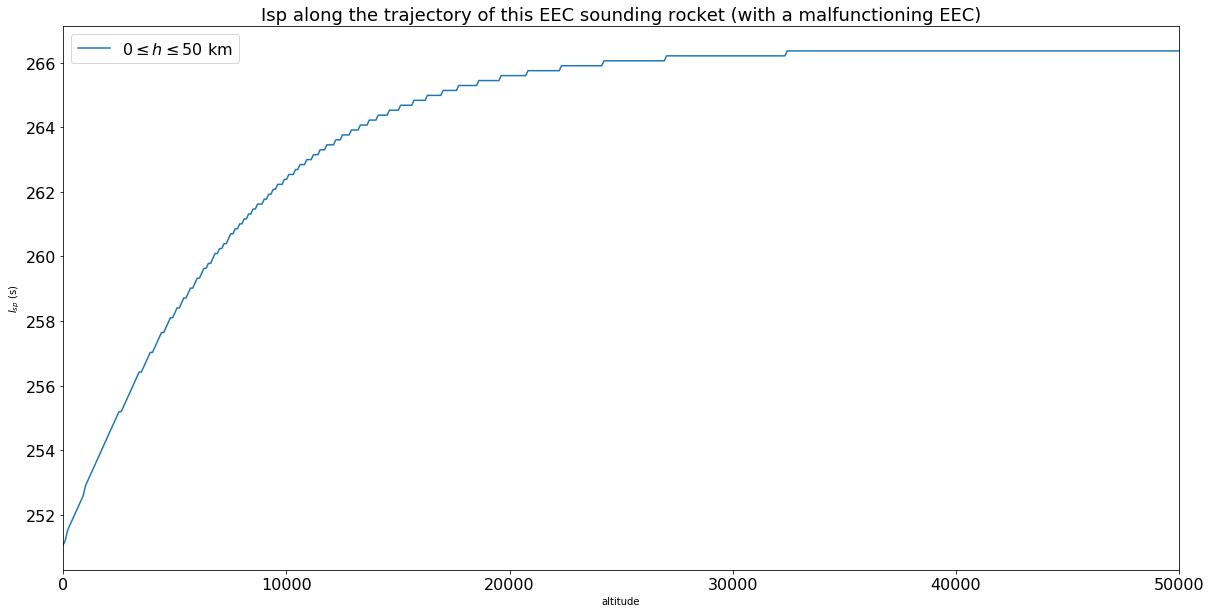

Using a left handed approximation, the total impulse we have calculated was:
13277.314


In [13]:
####### SETTING UP THE PLOT ########
h = np.linspace(0,75000,750)
eps = 10
c_fv = 1.74231
c_f = []
i = 0
for item in h:
    atmos = atmosphere(item,0,'SI')
    atmos.hCalc()
    c_f.append(rounds(c_fv - (atmos.P/P_c)*eps))
Isp = []
for item in c_f:
    Isp.append((item*cStar)/g)

####### PLOT ########
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
#
plt.plot(h,Isp,'-',label="$0\leq h\leq 50$ km")
#
plt.title('Isp along the trajectory of this EEC sounding rocket (with a malfunctioning EEC)', fontsize=18)
plt.xlim(0,50000)
#plt.ylim(0,0.1)
plt.xlabel('altitude')
plt.ylabel('$I_{sp}$ (s)')
plt.legend(loc=2, fontsize=16)
#
#plt.savefig('figure')
#
plt.show()
plt.close()

# same h_t function as before
impulse = 0
for jtem in h_t:
    for ktem in h:
        if nearly_equal(rounds(ktem),rounds(jtem),-2):
            k = np.where(h == ktem)[0][0]
            j = np.where(h_t == jtem)[0][0]
            impulse += Isp[k]
mDot = (P_c * A_t)/cStar
impulse = impulse * mDot
print("Using a left handed approximation, the total impulse we have calculated was:")
print(rounds(impulse))

PART D)

If the nozzle were to expand inadvertantly at the launch, we would probably have seperation in the nozzle. At sea level, the following would be our thrust and $I_{sp}$ assuming either full flow, or seperated flow using the Kalt-Bendall correlation.

In [14]:
#Assume full flow - finding thrust at Isp at sea level
eps = 50
c_fv = 1.90236
c_f = c_fv - (101.325/P_c)*eps
F = c_f*P_c*A_t
Isp = (c_f*cStar)/g

#Assume seperation
P_sep = 101.325 * 0.667*(P_c/101.325)**(-0.2)
#P_sep/P_c = 0.002655375
c_fv_sep = 1.86778
eps_sep = 33.0
c_f_sep = c_fv_sep - (101.325/P_c)*eps_sep
F_sep = c_f_sep*P_c*A_t
Isp_sep = (c_f_sep*cStar)/g

print("Thrust and Isp values for full and seperated. See the code for the process.")
table = [["Thrust (kN)", F],
         ["Specific Impulse (s)", Isp],
         ["Separated Thrust (kN)", F_sep],
         ["Separated Isp (s)", Isp_sep]
        ]
display(HTML(tabulate.tabulate(table, tablefmt='html')))
print("The expansion ratio for this separation is: ", eps_sep)

## Finding altitude for full flow
ratioForEps50 = 0.0015730
P_full = P_c * ratioForEps50
atmos = atmosphere(P_full,valGiven=1,units='SI')
atmos.PCalc()
print("Altitude for full flow: " + str(rounds(atmos.h)) + " m")

Thrust and Isp values for full and seperated. See the code for the process.


Thrust (kN),142.094
Specific Impulse (s),214.428
Separated Thrust (kN),155.816
Separated Isp (s),235.135


The expansion ratio for this separation is:  33.0
Altitude for full flow: 13257.498 m
